In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
rng = np.random.default_rng()

# this is setup to roll n_dice n_throws times. 
# If we want to look at 2 dice rolled against eachother 100 times we would call roll_dice(100, 2)
def roll_dice(n_throws, n_dice, n_sides=6):
    result = []
    for i in range(n_throws):
        # here rng.integers calls the random number generator to pull integers from a uniform distribution
        result.append(rng.integers(low = 1, high = n_sides, size = n_dice, endpoint=True))
    
    return result

# will have output like
# [array([2, 6]), array([6, 1]), array([3, 1]), array([5, 5]), ...]

def attack(n_attack_dice, n_deffend_dice, n_throws):
    # roll all dice
    throws = roll_dice(n_throws, n_attack_dice + n_deffend_dice)
    results = []
    min_die = min([n_attack_dice, n_deffend_dice])
    
    # for each set, compare attacker vs defender rolls
    for i in range(n_throws):
        attack_list = throws[i][0:n_attack_dice].tolist()
        deffend_list = throws[i][n_attack_dice:].tolist()
        attack_list.sort(reverse=True)
        deffend_list.sort(reverse=True)
        score = [0,0]
        
        for i in range( min_die ):
            if attack_list[i] > deffend_list[i]:
                # first number is attacker wins
                score[0] +=1
            else:
                # seccond number is defender wins
                score[1] +=1

        results.append(score)
    
    return results

def review_results(matchups):
    results = {}
    for i in range(len(matchups)):
        name = str(matchups[i])
        if name in results.keys():
            results[name] +=1
        else:
            results[name] = 1
    
    return results

def prep_for_graph(results):
    labels = []
    values = []
    for i in sorted(results.keys()):
        labels.append(i)
        values.append(results[i])
    
    return labels, values

def normalize_values(values):
    total = 0
    for i in values:
        total += i
    output = []
    for i in values:
        output.append(100 * i/total)
    return output

In [3]:
# shamelessly copy-pasting code found on the internet
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        
def fancy_plot(n_attack, n_deffend, n_rolls):
    labels, values = prep_for_graph(review_results(attack(n_attack,n_deffend,n_rolls)))

    fig, ax = plt.subplots()
    rects = ax.bar(labels, normalize_values(values))
    ax.set_title("Attack Dice ="+str(n_attack)+", Defender Dice ="+str(n_deffend)+"\n"+str(n_rolls)+" rolls\n[Attacker wins, Deffender wins]")
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
    ax.set_ylim(ymax=max(normalize_values(values)) * 1.15)

    autolabel(ax, rects)
    plt.show()

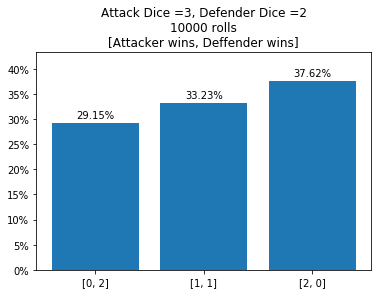

In [4]:
fancy_plot(3, 2, 10000)

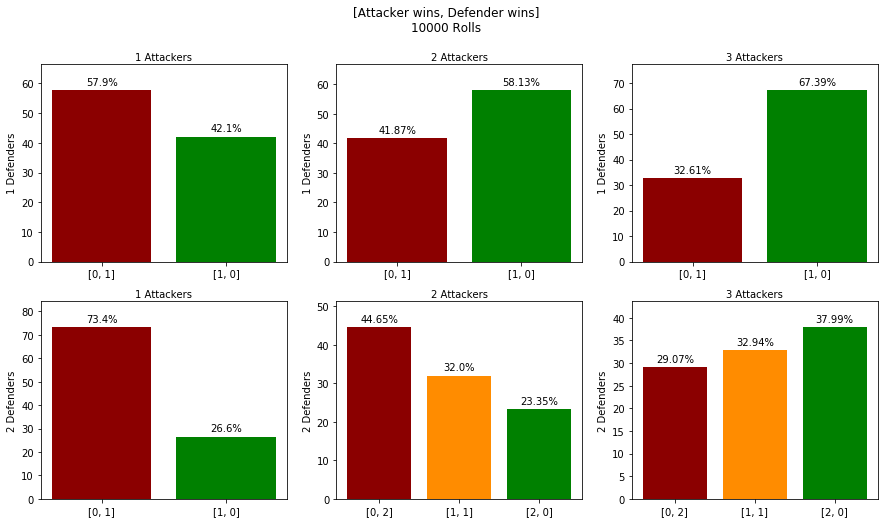

In [45]:
# extra_fancy_plot
color_dict = {
    '[0, 1]' : 'darkred',
    '[0, 2]' : 'darkred',
    '[1, 1]' : 'darkorange',
    '[1, 0]' : 'green',
    '[2, 0]' : 'green'
}

n_rolls = 10000

fig, axs = plt.subplots(2, 3, figsize=(15,8))
fig.suptitle("[Attacker wins, Defender wins]\n"+str(n_rolls)+" Rolls")

for defender in range(2):
    for attacker in range(3):
        labels, values = prep_for_graph(review_results(attack(attacker + 1, defender+1,n_rolls)))
        colors = []
        for label in labels:
            colors.append(color_dict[label])
        rects = axs[defender, attacker].bar(labels, normalize_values(values), color = colors)
        # axs[defender, attacker].set_title('Attackers:'+str(attacker+1)+", Deffenders:"+str(defender+1))
        axs[defender, attacker].set(xlabel= str(attacker+1)+' Attackers', ylabel = str(defender+1)+' Defenders')
        axs[defender, attacker].xaxis.set_label_position('top')
        axs[defender, attacker].set_ylim(ymax=max(normalize_values(values))*1.15)
        autolabel(axs[defender, attacker], rects)

#for ax in axs.flat:
#    ax.label_outer()
    
